# Tutorial for *CYCLUS*: Nuclear Fuel Cycle Simulator 

<img src="img/cyclus_img.gif" width="400">

[*CYCLUS*](http://fuelcycle.org/) is an open source nuclear fuel cycle simulator. Through the use of agents and its user-customizable archetypes (called prototypes), cyclus  allows for freedom in fidelity, depth, and focus of the simulation.
<br><br>
The prior tutorial employed very simple dynamics. To fully appreciate CYCLUS, lets model a more complex scenario. In this tutorial we will run a previously made *CYCLUS* input file, default_input_file.xml, which models the European Fuel Cycle. 

❖ **Learning Objectives**

-   Use *CYCLUS* to simulate default_input_file.xml 
-   Utilize cyutils (*CYCLUS* analysis package) to analyze the *CYCLUS* output file


# Excerise 1
### Viewing the *CYCLUS* input file:
This first exercise will view a more complicated *CYCLUS* input file


To begin, let's import the necesary packages.

In [1]:
from pyne import nucname
import analysis
import matplotlib.pyplot as plt
import numpy as np
from numpy import isclose

In [2]:
with open('template/separations.xml','r') as maininput:
    print(maininput.read())

<simulation>
  <control>
    <duration>720</duration>
    <startmonth>1</startmonth>
    <startyear>2018</startyear>
    <decay>never</decay>
  </control>
  <archetypes>
      <spec>
        <lib>cycamore</lib>
        <name>Enrichment</name>
      </spec>
      <spec>
        <lib>cycamore</lib>
        <name>Reactor</name>
      </spec>
      <spec>
        <lib>cycamore</lib>
        <name>Source</name>
      </spec>
      <spec>
        <lib>cycamore</lib>
        <name>Sink</name>
      </spec>
      <spec>
        <lib>cycamore</lib>
        <name>FuelFab</name>
      </spec>
      <spec>
        <lib>cycamore</lib>
        <name>Separations</name>
      </spec>
      <spec>
        <lib>agents</lib>
        <name>NullRegion</name>
      </spec>
      <spec>
        <lib>agents</lib>
        <name>NullInst</name>
      </spec>
    </archetypes>
    <commodity>
        <name>u-ore</name>
        <solution_priority>1.0</solution_priority>
    </commodity>
    <commodity>
        <n

# Excerise 2
### Running the Simulation:
*CYCLUS* can be run using a single terminal command, given below. The cell will run this command for you, but it's also possible to remove the ! and directly run it in the terminal

In [11]:
# CYCLUS will not overwrite an old file - delete the old version if you run a simulation again and put
# the output to the same filename
! rm sep.sqlite
! cyclus template/separations.xml -o sep.sqlite
# this is a command that can be executed in your terminal, without the ! . The -o flag is used to
# set the name of the output file.  Without it, the default is "cyclus.sqlite"

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   


Status: Cyclus run successful!
Output location: sep.sqlite
Simulation ID: 89544649-35bf-4c9a-990b-6b7e31685fd3


# Exercise 3
### Analyze the results:

*CYCLUS* creates a .sqlite file as its output.  SQL is a database file type that consists of a series of tables.  A few functions have been included in cyutils.analysis.py to pull information from the sqlite database and create figures.<br><br>
An sqlite database can be opened and its contents viewed, but these database browsers often aren't helpful. Importing the data into an external function and manipulating it would provide more useful information. However, it can still be helpful to open and view the tables.


First, a cursor that points to the sqlite file is created:

In [12]:
cur = analysis.cursor('sep.sqlite')
init_year, init_month, duration, timestep = analysis.simulation_timesteps(cur)

Lets use the `plot_power` function!

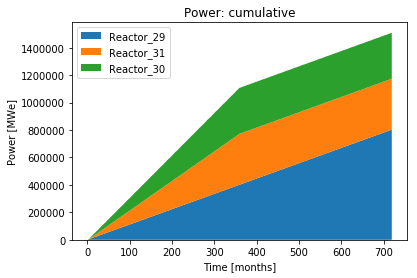

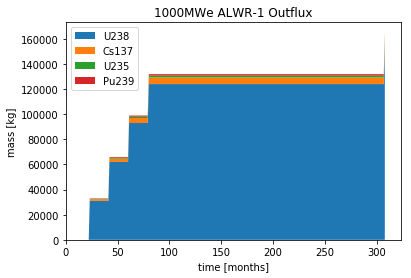

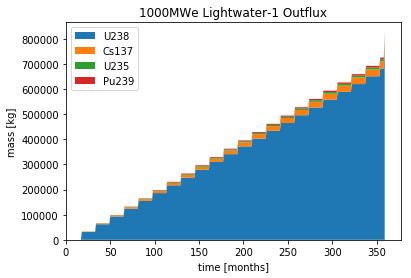

In [13]:
analysis.plot_cumulative_power(cur,reactors=[])
analysis.plot_out_flux_cumulative(cur, '1000MWe ALWR-1','1000MWe ALWR-1 Outflux')
analysis.plot_out_flux_cumulative(cur, '1000MWe Lightwater-1','1000MWe Lightwater-1 Outflux')

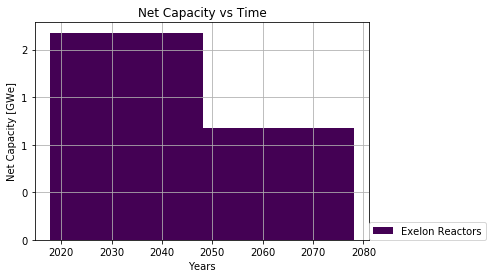

In [14]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

Let's take a look at the total mass of spent nuclear fuel stored at the Nuclear Waste Repository.
To plot, use the `analysis.plot_in_flux_cumulative(cur, facility, title)` function. 
<div class="alert alert-info">
**Interactive Input**
<br/>
Using the table below, create the following variables.  Include appropriate comments.
</div>

| Variable | Value  | Purpose |
| -------- | ------ | ------- |
| `facility`      | `'NuclearRepository'` | facility of interest |
| `title`     | `'Cumulative Isotope Inventory of Repository'` | title of plot |


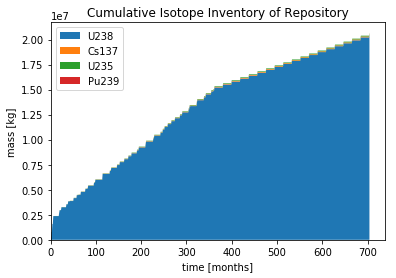

In [15]:
analysis.plot_in_flux_cumulative(cur, 'NuclearRepository', 'Cumulative Isotope Inventory of Repository')

In [8]:
#tailings timeseries both cumulative and non-cumulative up till 2050
analysis.plot_commodity(cur,archetype='sink',facility_commodity=['tails'],is_outflux=False,is_cum=True)
agent_ids = analysis.agent_ids(cur, 'Sink')
tails_dict = analysis.facility_commodity_flux(cur, agent_ids, ['tails'], False)
tails_dict['tails'] = tails_dict['tails'][:960]
tails_no_cum = analysis.facility_commodity_flux(cur, agent_ids, ['tails'], False, False)
tails_no_cum['tails'] = tails_no_cum['tails'][:960]
analysis.double_axis_bar_line_plot(tails_no_cum, tails_dict, timestep[:960], 'Years', 'Monthly Discharge Mass [MTHM]', 'Cumulative Mass [MTHM]',
                   'Tails Mass vs Time', 'tailings', init_year)

print('Total Tails in MTHM:')
print(max(tails_dict['tails']))

Total Tails in MTHM:
22710.9051095


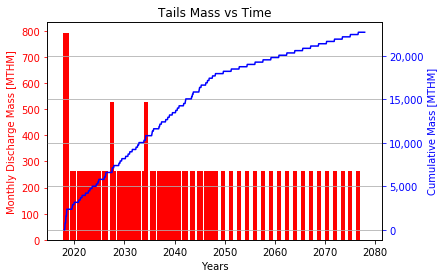

In [9]:
from IPython.display import Image
Image(filename='tails_tailings.png')


In [10]:
# get total fuel mass vs time plot up until 2150
fuels = analysis.plot_fuel(cur, ['fresh-uox', 'fresh-mox'], True)


fresh-mox has no values


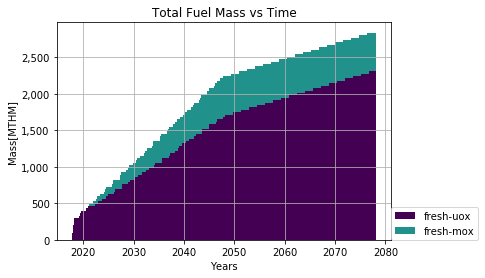

In [14]:
from IPython.display import Image
Image(filename='total_fuel.png')